# Vanilla ML Classifiers

### This notebook contains our Support Vector Classifier, Decision Tree and Random Forest Classifiers

# Table of Contents

1. Import the data
2. Preprocess the data
3. Train classifiers
4. Check performance of each classifier

# Import the required libraries

In [14]:
import numpy as np
from PIL import Image
import cv2

## Add the data to a pipeline for later use

In [2]:
import glob
import os

paths = glob.glob((os.getcwd()+'/../input_data/augmented_images/*'))

# get the list of dishes
dishes = [path.split('/')[-1] for path in paths]
dishes[0:5]

['Baked_salmon_and_new_potatoes',
 'Steak_and_chips',
 'Macaroni_cheese',
 "Shepherd's_pie",
 'Sausage_rolls']

In [3]:
# create a dict of dishes, so we have an integer, instead of a string
dishes_dict = {}
for i, dish in enumerate(dishes):
    dishes_dict[dish] = i

dishes_dict

{'Baked_salmon_and_new_potatoes': 0,
 'Steak_and_chips': 1,
 'Macaroni_cheese': 2,
 "Shepherd's_pie": 3,
 'Sausage_rolls': 4,
 'Chicken_tikka_masala': 5,
 'Chicken_burger_and_chips': 6,
 'Jacket_potato_with_beans_and_cheese': 7,
 'Roast_chicken_meat': 8,
 'Chicken_and_mushroom_pie': 9,
 'Black_pudding': 10,
 'Stir_fry': 11,
 'Bacon_sandwich': 12,
 'Spaghetti_Bolognese': 13,
 'Roast_potatoes': 14,
 'Fajita_wraps': 15,
 'Eggs_(Fried)': 16,
 'Toast': 17,
 'Roast_beef_meat': 18,
 'Mushrooms': 19,
 'Lasagne': 20,
 'Steak_and_kidney_pie': 21,
 'Beef_stew': 22,
 'Fish_finger_sandwiches': 23,
 'Pasta_bake': 24,
 'Cottage_pie': 25,
 'Fish_and_chips': 26,
 'Sweet_and_sour_chicken': 27,
 'Beans_on_toast': 28,
 'Full_English_breakfast': 29,
 'Thai_curry': 30,
 'Baked_beans': 31,
 'Sausage_and_mash': 32,
 'Sunday_roast_with_all_the_trimmings': 33,
 'Beef_burger_and_chips': 34,
 'Omelette': 35,
 'Cornish_pasties': 36,
 'Sausage': 37,
 'Chilli_con_carne': 38,
 'Pigs_in_blankets_(sausages_wrapped_in_b

The next step is formatting the data so we can use it in our ML pipeline

In [4]:
X = np.empty(shape=(1,2700))
y = np.empty(shape=(1,1), dtype=np.int32)

for i, dish in enumerate(dishes):
    files = glob.glob((os.getcwd()+'/../input_data/augmented_images/'+dish+'/*.jpg'))
    images = np.array([np.asarray(Image.open(file)).flatten() for file in files])

    X = np.concatenate((X, images), axis=0)
    _y = np.array(dishes_dict[dish], ndmin=2)

    print(images.shape, _y.shape)

    for i in range(images.shape[0]):
        y = np.concatenate((y, _y), axis=0)

(800, 2700) (1, 1)
(792, 2700) (1, 1)
(808, 2700) (1, 1)
(800, 2700) (1, 1)
(816, 2700) (1, 1)
(800, 2700) (1, 1)
(800, 2700) (1, 1)
(800, 2700) (1, 1)
(800, 2700) (1, 1)
(800, 2700) (1, 1)
(800, 2700) (1, 1)
(792, 2700) (1, 1)
(776, 2700) (1, 1)
(792, 2700) (1, 1)
(800, 2700) (1, 1)
(792, 2700) (1, 1)
(792, 2700) (1, 1)
(736, 2700) (1, 1)
(800, 2700) (1, 1)
(800, 2700) (1, 1)
(800, 2700) (1, 1)
(792, 2700) (1, 1)
(800, 2700) (1, 1)
(792, 2700) (1, 1)
(800, 2700) (1, 1)
(800, 2700) (1, 1)
(784, 2700) (1, 1)
(800, 2700) (1, 1)
(800, 2700) (1, 1)
(800, 2700) (1, 1)
(792, 2700) (1, 1)
(800, 2700) (1, 1)
(680, 2700) (1, 1)
(816, 2700) (1, 1)
(800, 2700) (1, 1)
(800, 2700) (1, 1)
(792, 2700) (1, 1)
(800, 2700) (1, 1)
(792, 2700) (1, 1)
(808, 2700) (1, 1)
(792, 2700) (1, 1)
(800, 2700) (1, 1)
(792, 2700) (1, 1)
(800, 2700) (1, 1)
(776, 2700) (1, 1)
(560, 2700) (1, 1)
(800, 2700) (1, 1)
(792, 2700) (1, 1)
(800, 2700) (1, 1)
(800, 2700) (1, 1)
(800, 2700) (1, 1)
(800, 2700) (1, 1)
(784, 2700) 

## Shuffle, scale and split the dataset

We need to shuffle the data so the model doesn't learn 'the first 800 images and Bacon, the next 800 are x, and so forth'

In [5]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

sc_X = MinMaxScaler()

# remove the first element because it is a dud
X = np.delete(X, 0, 0)
y = np.delete(y, 0, 0)

# verify that X and y have the same length
assert(X.shape[0] == y.shape[0])

# shuffle
X, y = shuffle(X, y, random_state=0)

# normalize the dataset
X = sc_X.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

(41841, 2700) (41841, 1)


((33472, 2700), (33472, 1), (8368, 2700), (8368, 1))

## Decision Tree Classifier

The first alg. is the Decision Tree Classifier.

In [6]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

dt_clf.fit(X_train, y_train.ravel())

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [7]:
from sklearn.metrics import accuracy_score

y_pred_dt = dt_clf.predict(X_test)

print(accuracy_score(y_test, y_pred_dt))

0.09357074569789675


0.9895136233269598

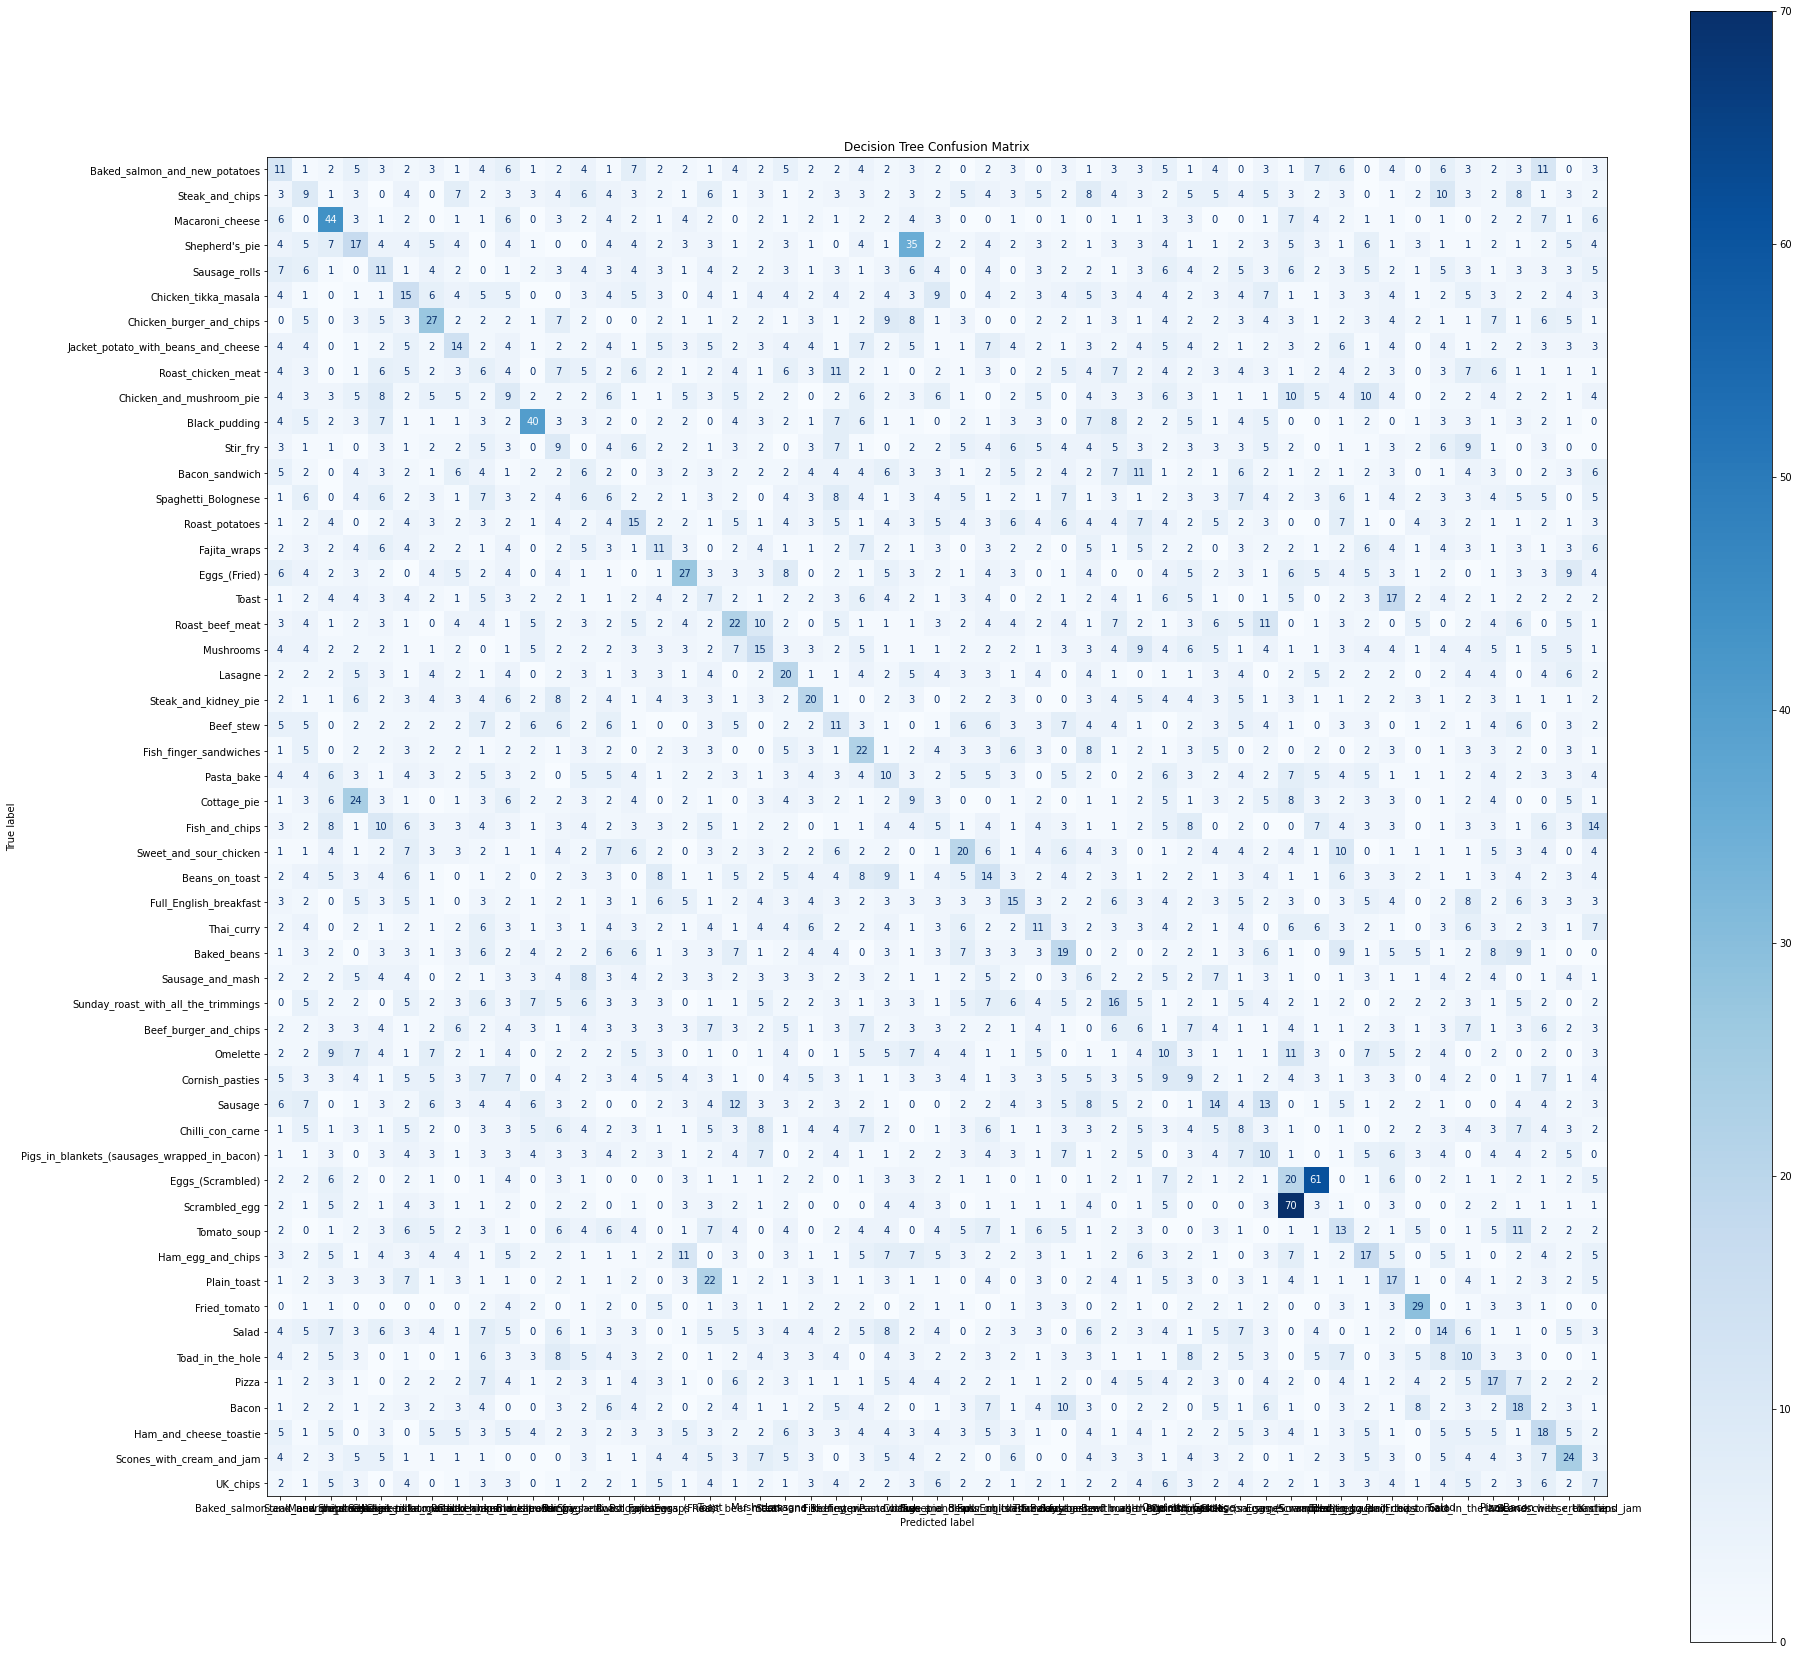

In [8]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (30, 30)

disp = ConfusionMatrixDisplay.from_estimator(
    dt_clf,
    X_test,
    y_test,
    display_labels=dishes,
    cmap=plt.cm.Blues,
)
disp.ax_.set_title("Decision Tree Confusion Matrix")

dt_clf.score(X_train, y_train)

## SVM Classifier

In [9]:
from sklearn.svm import SVC

svc_clf = SVC(random_state=0)

svc_clf.fit(X_train, y_train.ravel())

SVC(random_state=0)

In [10]:
y_pred_svc = svc_clf.predict(X_test)

print(accuracy_score(y_test, y_pred_svc))

0.26756692160611856


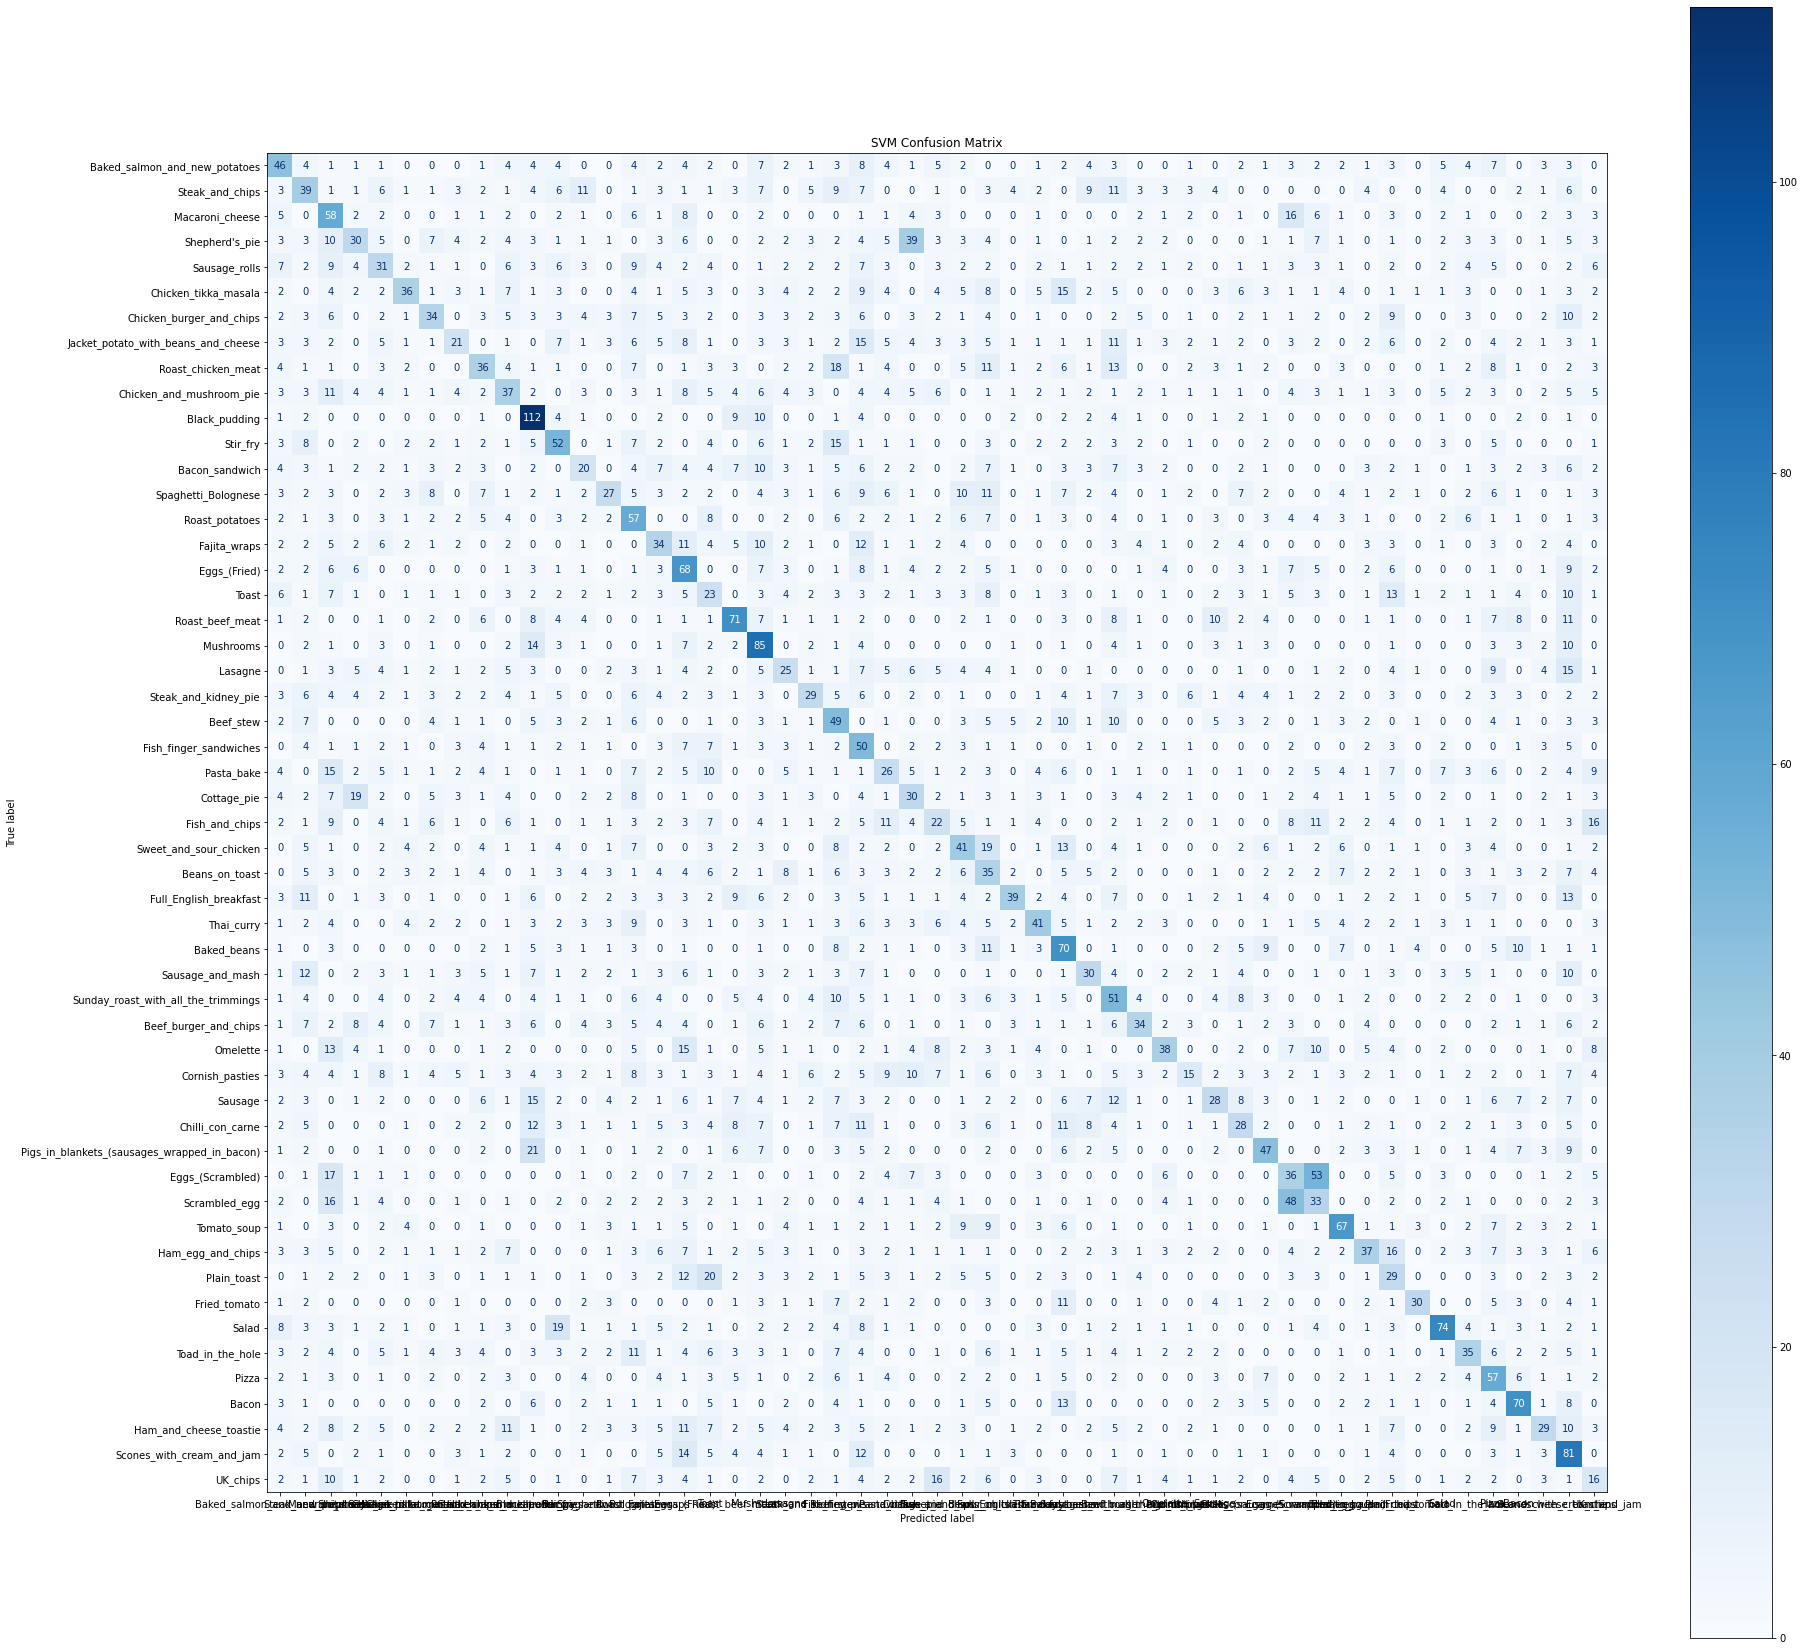

In [11]:
disp = ConfusionMatrixDisplay.from_estimator(
    svc_clf,
    X_test,
    y_test,
    display_labels=dishes,
    cmap=plt.cm.Blues,
)
disp.ax_.set_title("SVM Confusion Matrix")

plt.show()

## Random Forest Classifier

From our initial tests, we've discovered that from these 3 classifiers Random Forests had the best performance. We've decided to tune the hyperparameters to increase the performance of the models. For this to work, we've used GridSearch, which picks the best performing parameters.

We also used Cross Validation along with GridSearch to determin the best parameters.

In [12]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=0)

params = [{'n_estimators': [200, 600],
         'warm_start': ['True', 'False'],
         'max_features': ['sqrt', 'log2']}]

# show all the hyper-parameters
RandomForestClassifier().get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [ ]:
from sklearn.model_selection import GridSearchCV

gs_rf = GridSearchCV(clf,
                      param_grid=params,
                      scoring='accuracy',
                      cv=10)
gs_rf.fit(X_train, y_train.ravel())
print(gs_rf.best_params_)


# find best model score
gs_rf.score(X_train, y_train), gs_rf.score(X_test, y_test)

# "If GridSearchCV is initialized with refit=True (which is the default), then once it finds the best estimator using cross-validation, it retrains it on the whole training set" - Aurelion Geron, Hands On Machine Learning

In [16]:
rf = RandomForestClassifier(n_estimators=600, warm_start=True, max_features='sqrt', random_state=0)

rf.fit(X_train, y_train.ravel())

RandomForestClassifier(max_features='sqrt', n_estimators=600, random_state=0,
                       warm_start=True)

In [17]:
from sklearn.metrics import accuracy_score

y_pred = rf.predict(X_test)

accuracy_score(y_test, y_pred)

0.2940965583173996

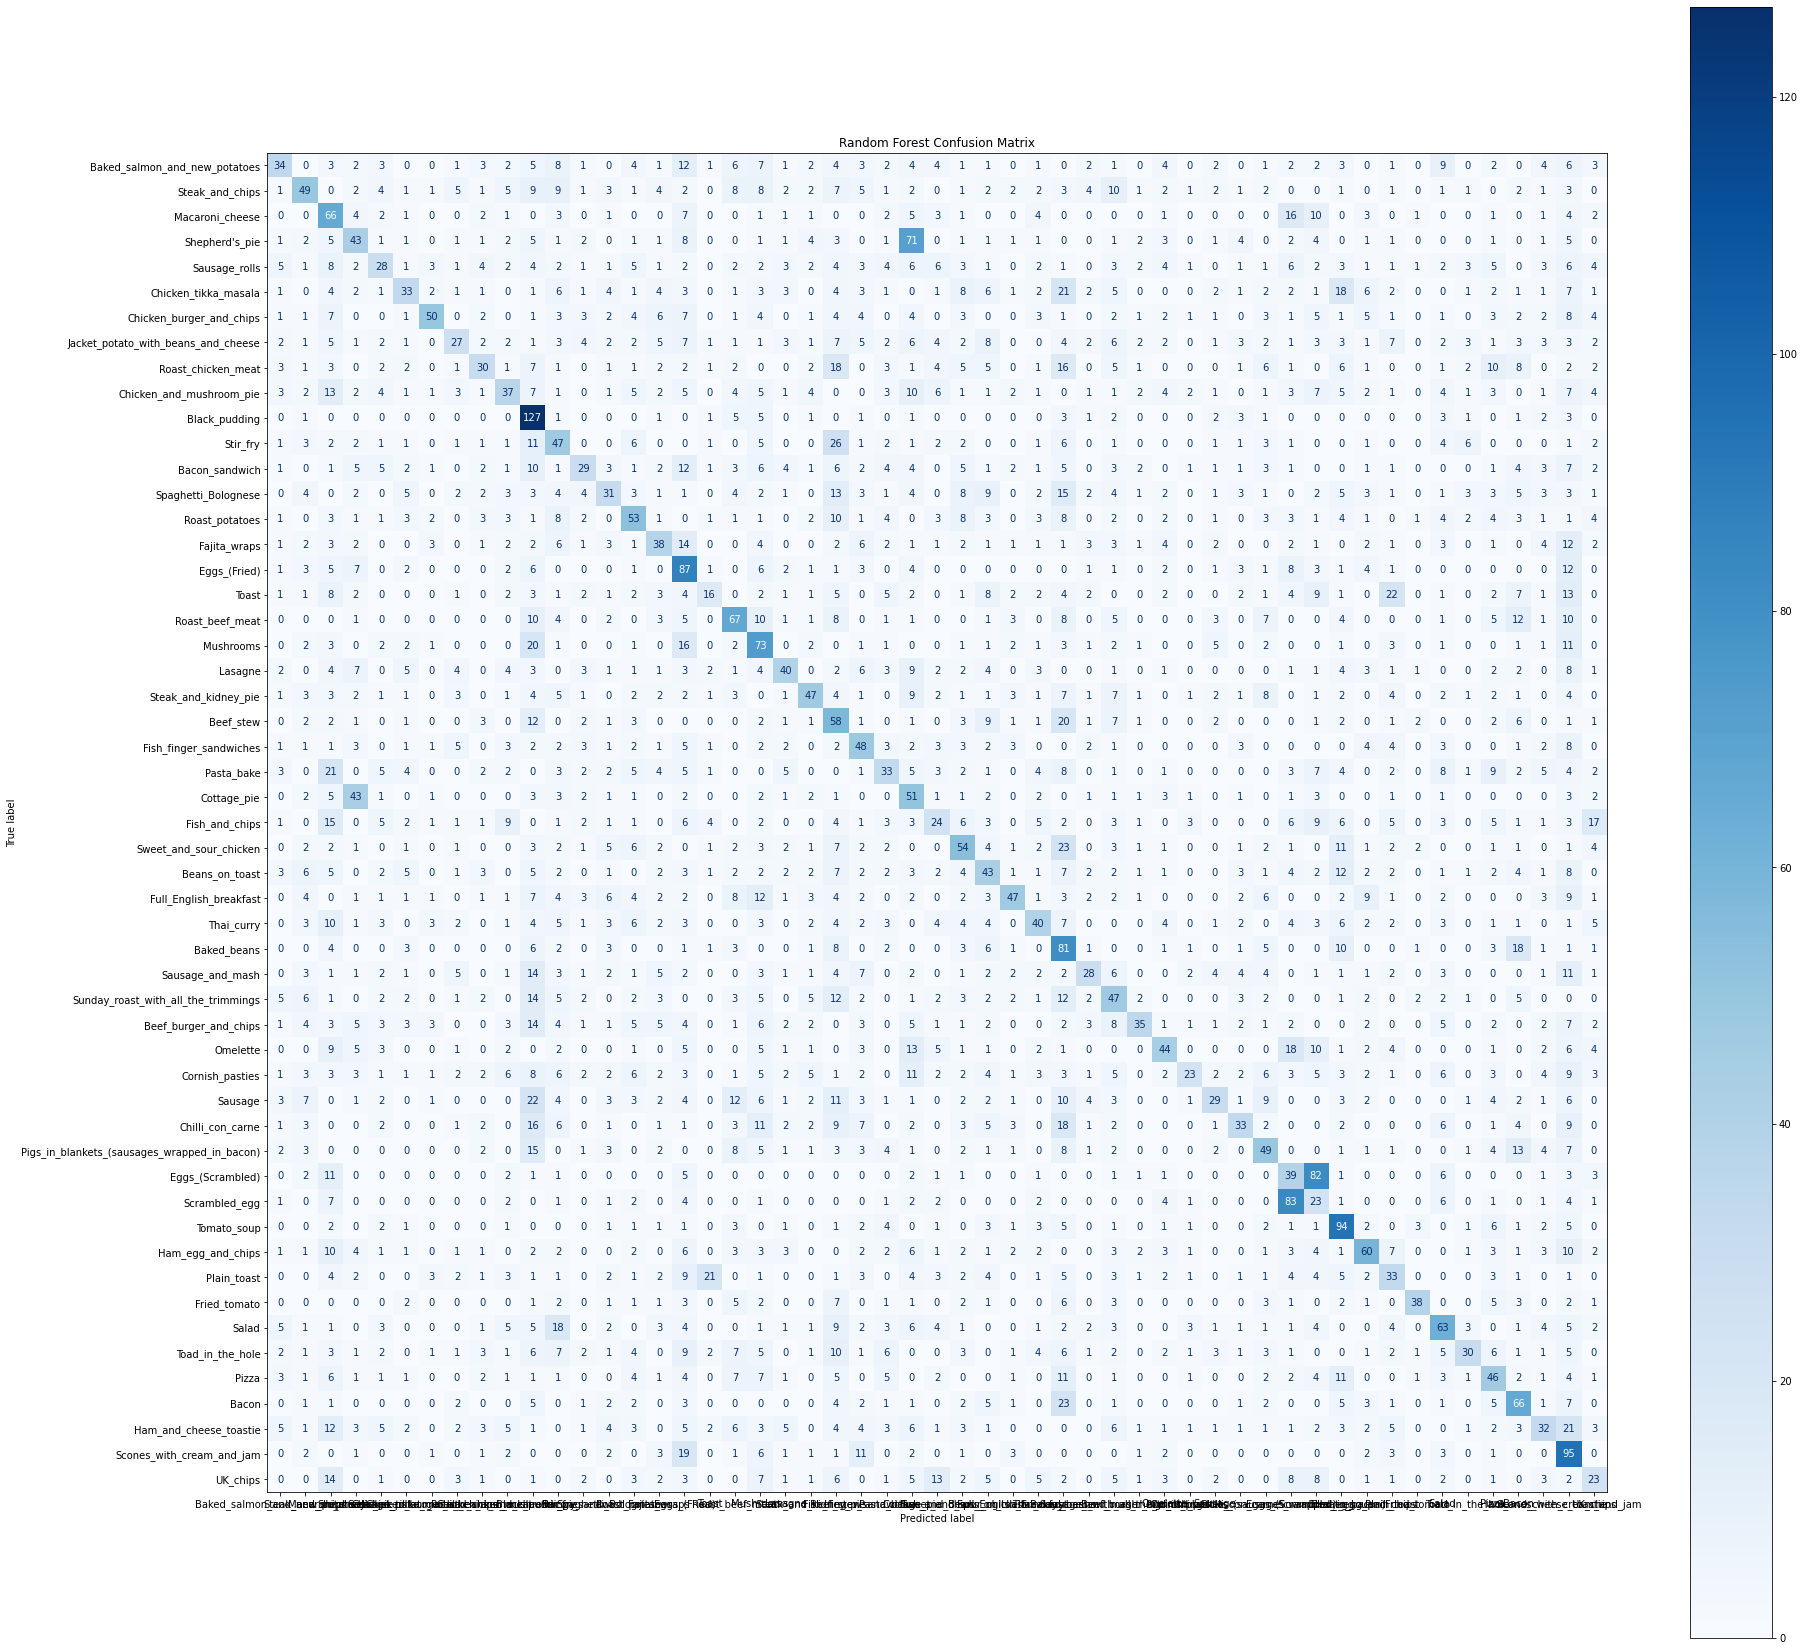

In [18]:
disp = ConfusionMatrixDisplay.from_estimator(
    rf,
    X_test,
    y_test,
    display_labels=dishes,
    cmap=plt.cm.Blues,
)
disp.ax_.set_title("Random Forest Confusion Matrix")

plt.show()

# Conclusions

In this dataset we have showcased 3 Machine Learning algorithms. While these classifiers do offer a solution, it is lackluster and seems inadequate for our needs, as the performance is lacking in many aspects.

One could make the argument that, by adding more data, the algorithms will have a better performance, but we believe Neural Networks will offer an improvement with the same dataset.